## Decomposition of Linear Velocity Fields
&copy; Harishankar Manikantan, 2020

$~$

This module attempts to visualize the decomposition of a fluid velocity field into extensional and rotational components. Any well-defined velocity field $\mathbf{u}(\mathbf{x})$ can be expanded as as a Taylor series around a point $\mathbf{x}_0$:

$$\mathbf{u}(\mathbf{x}) = \mathbf{u}(\mathbf{x}_0) + \mathbf{r}\cdot \nabla \mathbf{u} |_{\mathbf{x}_0} + \mathbf{r}\mathbf{r}: \nabla\nabla \mathbf{u} |_{\mathbf{x}_0} + \ldots$$

where $\mathbf{r}=\mathbf{x}-\mathbf{x}_0$ is the relative vector in a coordinate system around $\mathbf{x}_0$. 

Now, a velocity field is linear if the velocity gradient tensor $\nabla \mathbf{u}$ is a constant. In such a case, all subsequent derivatives of $\nabla \mathbf{u}$ vanish and the velocity at point $\mathbf{x}$ is just 

$$\mathbf{u}(\mathbf{x}) = \mathbf{u}(\mathbf{x}_0) + \mathbf{r}\cdot \nabla \mathbf{u} |_{\mathbf{x}_0}$$

Written this way, we can say that the velocity at a point is fully determined by the velocity at a neighboring point plus some change $\delta\mathbf{u}$ that only depends on the relative distance and the velocity gradient. This is approximately true even in nonlinear flows if we are in the vicinity of a point $\mathbf{x}_0$, such that $|\mathbf{r}|$ is small relative to some larger characteristic system length. Higher order terms then vanish because they are of magnitude $r^2$ or larger.

To understand the meaning of this $\delta\mathbf{u}$, let's think of specific examples. It's simpler to consider $\mathbf{x}_0$ to be the origin and the velocity at the origin to be zero: if a finite velocity $\mathbf{u}(\mathbf{x}_0)$ exits, it can be just added to every point in all that follows. And let's consider 2D, so it's easy to visualize. In this simplified geometry, the velocity at each point is simply

$$\mathbf{u}(\mathbf{x}) = \delta \mathbf{u} = \mathbf{x} \cdot \nabla \mathbf{u}$$

The following snippet of code imports necessary Python modules, and generates a 2D vector grid in $x$ and $y$, both going from -5 to 5 with 20 points in between. The function `velocity` takes in any position $(x,y)$ and any constant velocity gradient tensor $\mathbf{A}=\nabla \mathbf{u}$ to return the actual velocity at the point:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,20)
y=np.linspace(-5,5,20)
xgrid,ygrid=np.meshgrid(x,y)

def velocity(x,y,A):
    u=x*A[0,0]+y*A[1,0]
    v=x*A[0,1]+y*A[1,1]
    return u,v

Let's use simple shear as an example. In this case, the (constant) velocity gradient tensor is 

$$\nabla \mathbf{u} = \begin{bmatrix} 0 & 0 \\ \dot{\gamma} & 0 \end{bmatrix},$$

where $\dot{\gamma}$ is the shear rate. Let's set up the vector velocity field $\mathbf{u} = \mathbf{x} \cdot \nabla\mathbf{u}$ corresponding to this tensor:

In [2]:
# simple shear, specify velocity gradient tensor
gdot=2
gradu=np.array([[0,0],[gdot,0]])

If you are comfortable using Jupyter notebooks, change this to any linear flow field and re-run all the code that follows to see how that flow decomposes. Let's plot a vector field to visualize the flow:

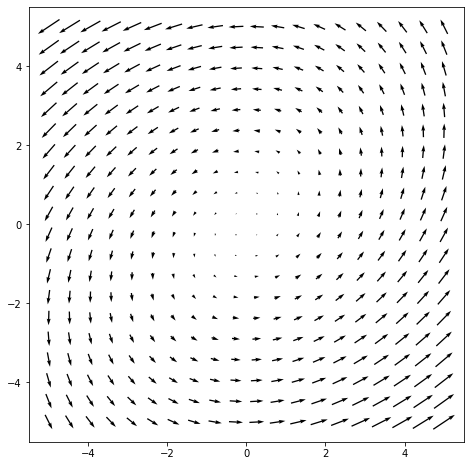

In [3]:
# generate velocity components at each grid point
u,v=velocity(xgrid,ygrid,gradu)

plt.figure(figsize=(8,8))
plt.quiver(xgrid,ygrid,u,v,pivot='mid')
plt.axis('scaled')
plt.show()

That looks like the familiar idea of shearing something. The fluid is pushed to the right on top, and to the left at the bottom, and flow lines are all horizontal.

Let's try to make sense of the velocity field in some more detail. Each fluid element can do one of three things to deform: move (translate with a constant velocity), stretch, or rotate. The part corresponding to simple translation is the $\mathbf{u}(\mathbf{x}_0)$ bit, which is trivial an we have set to $0$. 

The other two parts (corresponding to stretch and rotation) can be extracted from the symmetric and anti-symmetric parts of the velocity gradient. For this, note that any tensor $\mathbf{A}$ can be written as

$$\mathbf{A} = \left( \frac{1}{2}\mathbf{A}+\frac{1}{2}\mathbf{A}^T \right)+ \left(\frac{1}{2}\mathbf{A}-\frac{1}{2}\mathbf{A}^T \right)
= \mathrm{sym}(\mathbf{A})+\mathrm{skew}(\mathbf{A})
$$

Decomposing the velocity gradient tensor this way gives the symmetric 'rate of strain' tensor $\mathbf{E}$ and the anti-symmetric vorticity tensor $\mathbf{W}$:

$$ \mathbf{E} = \frac{\nabla \mathbf{u}+\nabla \mathbf{u}^T}{2} \\ 
\mathbf{W} = \frac{\nabla \mathbf{u}-\nabla \mathbf{u}^T}{2}$$

Let's first see what the part of the flow corresponding to $\mathbf{E}$ looks like. This would be the velocity field $\mathbf{u}_{ext}=\mathbf{x}\cdot\mathbf{E}$:

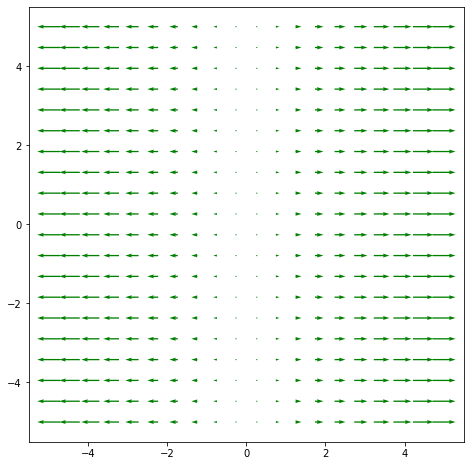

In [4]:
# extensional component

# generate symmetric part of velocity gradient tensor
E=(gradu+np.transpose(gradu))/2

# generate velocity components at each grid point
uext,vext=velocity(xgrid,ygrid,E)

plt.figure(figsize=(8,8))
plt.quiver(xgrid,ygrid,uext,vext,color='g',pivot='mid')
plt.axis('scaled')
plt.show()

The velocity field resulting solely from $\mathbf{E}$ is _purely extensional_. This means that $\mathbf{u}_{ext}$ is entirely responsible for the stretching of fluid elements. There is no rotational component in the above velocity field.

Since $\mathbf{E}$ is a symmetric matrix, we can extract some more information. The eigenvalues of $\mathbf{E}$ are the principal rate of extension (or compression, if negative), and the corresponding eigenvectors are the directions of extension (or compression). Let's check this:

In [5]:
# principal directions of stretch

evals,evecs=np.linalg.eig(E)

print('\n symmetric part of velocity gradient tensor:\n', E)
print('\n first eigenvalue: %6.4f' %evals[0], 'with corresponding eigenvector:', evecs[:,0])
print('\n second eigenvalue: %6.4f' %evals[1], 'with corresponding eigenvector:', evecs[:,1])


 symmetric part of velocity gradient tensor:
 [[1. 0.]
 [0. 0.]]

 first eigenvalue: 1.0000 with corresponding eigenvector: [1. 0.]

 second eigenvalue: 0.0000 with corresponding eigenvector: [0. 1.]


So the first eigenvector is at an angle of 45 degrees and has a positive eigenvalue, so this is the principal direction of stretch. The principal direction of compression (the one with the negative eigenvalue) is along -45 degreees. This is better visualized by overlaying these directions on the extensional part of the flow. Here, the solid line represents the direction of extension while the dashed line is compression:

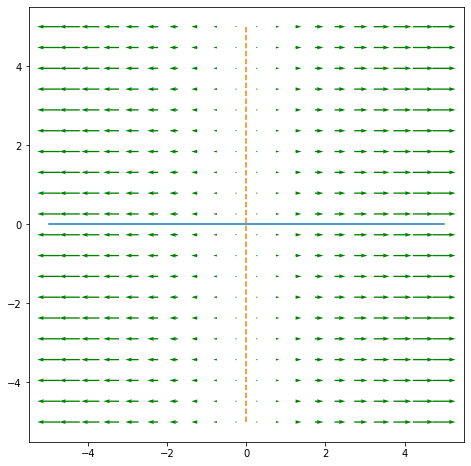

In [6]:
# principal directions of stretch with flow lines

plt.figure(figsize=(8,8))
plt.quiver(xgrid,ygrid,uext,vext,color='g',pivot='mid')

plt.plot(evecs[0,0]*x,evecs[1,0]*y,'-')
plt.plot(evecs[0,1]*x,evecs[1,1]*y,'--')
plt.axis('scaled')
plt.show()


Just knowing the eigenvalues and vectors of $\mathbf{E}$ can therefore tell us a lot about which way fluid elements (and stuff suspended in the fluid like particles, bubbles, solutes, ...) get stretched or compressed. And the eigenvectors are always orthogonal to each other. In the frame of reference of the eigenvectors, every fluid point simply extends and compresses in the two perpendicular directions. 

Now let's turn to the rotational part. The flow corresponding to $\mathbf{W}$ would be the velocity field $\mathbf{u}_{rot}=\mathbf{x}\cdot\mathbf{W}$:

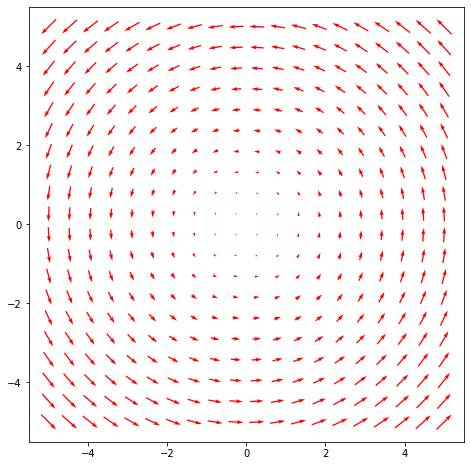

In [7]:
# rotational component

# generate anti-symmetric part of velocity gradient tensor
W=(gradu-np.transpose(gradu))/2

# generate velocity components at each grid point
urot,vrot=velocity(xgrid,ygrid,W)

plt.figure(figsize=(8,8))
plt.quiver(xgrid,ygrid,urot,vrot,color='r',pivot='mid')
plt.axis('scaled')
plt.show()

This component is responsible only for rotating each point relative to the origin (or any $\mathbf{x_0}$, in general). Points do not move closer or farther due to $\mathbf{u}_{rot}$: they maintain relative separation and simply rotate. Again, this is useful intuition, if you want to get a sense of whether a suspended particle would deform or merely rotate in a specified velocity field.

These two components add up to give the full velocity field:

$$ \mathbf{u}_{ext}+\mathbf{u}_{rot} = \mathbf{u}$$

This can also be visualized easily. Let's focus on the top right quadrant, and plot both extensional and rotaional bits simultaneously. Compare the total velocity at every point and convince yourself that a vector superposition of $\mathbf{u}_{ext}$ and $\mathbf{u}_{rot}$ does indeed retrieve the full velcity field.

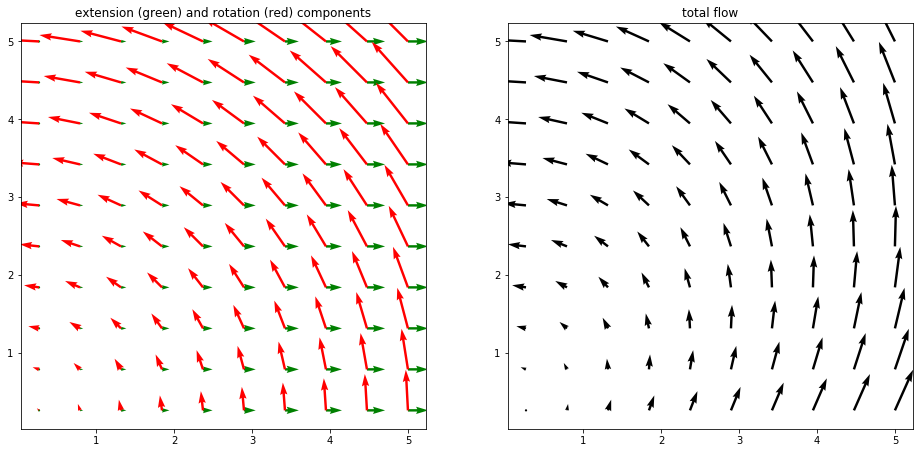

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.quiver(xgrid[10:,10:],ygrid[10:,10:],uext[10:,10:],vext[10:,10:],color='g',scale=100)
plt.quiver(xgrid[10:,10:],ygrid[10:,10:],urot[10:,10:],vrot[10:,10:],color='r',scale=100)
plt.title('extension (green) and rotation (red) components')
plt.axis('scaled')

plt.subplot(1,2,2)
plt.quiver(xgrid[10:,10:],ygrid[10:,10:],u[10:,10:],v[10:,10:],color='k',scale=100)
plt.title('total flow')
plt.axis('scaled')
plt.show()

We can get a better sense of how the fluid deforms by imagining a blob of colored liquid (of the same density and viscosity) immersed in it. Think of a drop of food coloring in a cup of water. The food coloring would then 'trace' the streamlines as it deforms. The following illustrates an approximate integration of the velocity to represent the direction of this deformation

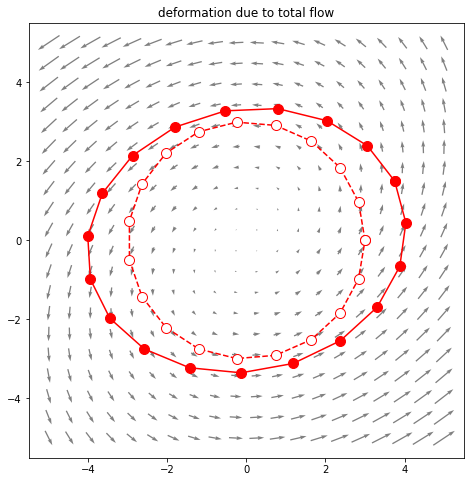

In [9]:
plt.figure(figsize=(8,8))

th=np.linspace(0,2*np.pi,20)
xdye=3*np.cos(th)
ydye=3*np.sin(th)

plt.quiver(xgrid,ygrid,u,v,pivot='mid',color='gray')
plt.plot(xdye,ydye,'ro--',markersize=10,markerfacecolor='white')

changex,changey=velocity(xdye,ydye,gradu)
xdye+=0.25*changex
ydye+=0.25*changey
plt.plot(xdye,ydye,'ro-',markersize=10,markerfacecolor='red')
plt.title('deformation due to total flow')

plt.axis('scaled')
plt.show()

And, the deformation can be better understood as the combination of extension/compression along the principal axes and rotation due to the vorticity tensor. These contributions are shown separately below:

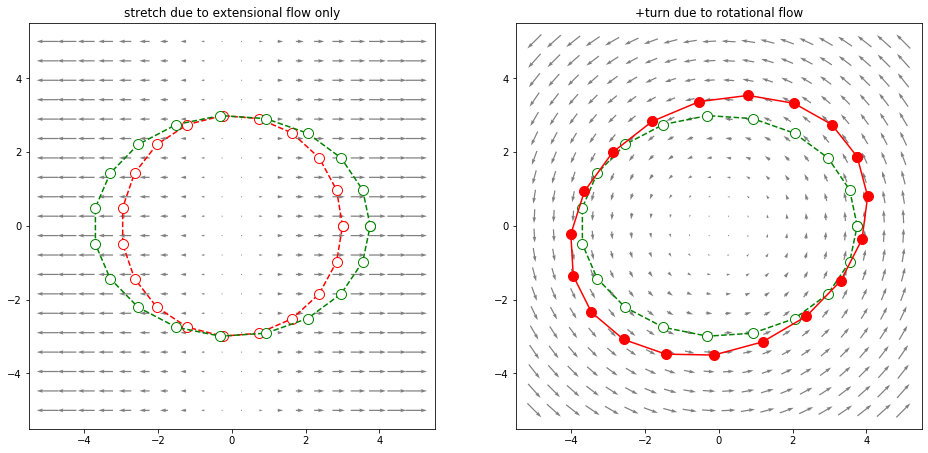

In [10]:
plt.figure(figsize=(16,8))

th=np.linspace(0,2*np.pi,20)
xdye=3*np.cos(th)
ydye=3*np.sin(th)

plt.subplot(1,2,1)
plt.quiver(xgrid,ygrid,uext,vext,pivot='mid',color='gray')
plt.plot(xdye,ydye,'ro--',markersize=10,markerfacecolor='white')

changex,changey=velocity(xdye,ydye,E)
xdye+=0.25*changex
ydye+=0.25*changey
plt.plot(xdye,ydye,'go--',markersize=10,markerfacecolor='white')
plt.axis('scaled')
plt.title('stretch due to extensional flow only')


plt.subplot(1,2,2)
plt.quiver(xgrid,ygrid,urot,vrot,pivot='mid',color='gray')
plt.plot(xdye,ydye,'go--',markersize=10,markerfacecolor='white')

changex,changey=velocity(xdye,ydye,W)
xdye+=0.25*changex
ydye+=0.25*changey
plt.plot(xdye,ydye,'ro-',markersize=10,markerfacecolor='red')
plt.axis('scaled')
plt.title('+turn due to rotational flow')

plt.show()